In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize
import kmeans

In [2]:
scale = preprocessing.MinMaxScaler()

In [3]:
df1 = pd.read_csv('/Users/amalalmansour/Downloads/MaxSlice_LIDC.csv')
#df2 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/Agreement_Binary_Rating.csv')
df2 = pd.read_csv('/Users/amalalmansour/Desktop/New_Images/Malignancy/machine_ratings/machine_mal_ratings.csv')

In [4]:
ID_agree = df2[['InstanceID','machine_Agreement', 'Binary Rating']]
ID_agree

,InstanceID,machine_Agreement,Binary Rating
0,4,Low Radiologists Agreement,3
1,118,Low Radiologists Agreement,3
2,134,Low Radiologists Agreement,3
3,143,Low Radiologists Agreement,3
4,175,Low Radiologists Agreement,3
...,...,...,...
1327,40771,Low Radiologists Agreement,3
1328,40780,Low Radiologists Agreement,3
1329,40794,High Radiologists Agreement,1
1330,40801,Low Radiologists Agreement,3


In [5]:
train_slices = pd.merge(ID_agree, df1)
display(train_slices)

,InstanceID,machine_Agreement,Binary Rating,noduleID,DicomImage,FilePath,subtlety,internalStructure,calcification,sphericity,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,4,Low Radiologists Agreement,3,1,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0001\1.3.6.1....,5,1,6,3,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,118,Low Radiologists Agreement,3,5,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,4,1,6,4,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052
2,134,Low Radiologists Agreement,3,3,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,5,1,6,5,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,143,Low Radiologists Agreement,3,4,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0003\1.3.6.1....,3,1,6,5,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,175,Low Radiologists Agreement,3,6,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-0004\1.3.6.1....,5,1,3,5,...,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000,0.0105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,40771,Low Radiologists Agreement,3,2655,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1010\1.3.6.1....,3,1,6,2,...,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000,0.0090
1328,40780,Low Radiologists Agreement,3,2657,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,5,...,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000,0.0013
1329,40794,High Radiologists Agreement,1,2656,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,1,6,3,...,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000,0.0020
1330,40801,Low Radiologists Agreement,3,2658,present,C:\LIDC_FULL\LIDC-IDRI\LIDC-IDRI-1011\1.3.6.1....,5,4,6,3,...,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000,0.0018


In [6]:
numeric_feature_names = ['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
                         'MajorAxisLength', 'MinorAxisLength',
                         'Elongation', 'Compactness', 'Eccentricity', 'Solidity', 'Extent',
                         'Circularity', 'RadialDistanceSD', 'SecondMoment', 'Roughness', 'MinIntensity',
                         'MaxIntensity', 'MeanIntensity', 'SDIntensity', 'MinIntensityBG',
                         'MaxIntensityBG', 'MeanIntensityBG', 'SDIntensityBG',
                         'IntensityDifference', 'markov1', 'markov2', 'markov3', 'markov4',
                         'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
                         'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
                         'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
                         'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
                         'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
                         'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
                         'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
                         'Entropy', 'x_3rdordermoment', 'Inversevariance', 'Sumaverage',
                         'Variance', 'Clustertendency']

In [7]:
df_feature = train_slices[numeric_feature_names]

In [8]:
df_feature

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Contrast,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,30300,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000
1,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,58900,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,22400,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,61400,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000
4,71,73,32.142136,31.494737,9.507892,10.528352,8.908660,1.181811,1.157927,0.532931,...,172000,0.634,0.0076,0.0296,4.98,15500000,0.0097,403.0,200000,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,73,75,32.384776,32.028485,9.640876,11.517956,8.186050,1.407022,1.143271,0.703474,...,79100,0.662,0.0071,0.0334,5.05,12500000,0.0130,446.0,101000,334000
1328,638,759,122.811183,111.554028,28.501348,40.463803,22.859777,1.770087,1.881245,0.825129,...,32400,0.877,0.0005,0.0527,7.81,2250000,0.0229,496.0,130000,488000
1329,437,464,84.669048,79.410448,23.588253,27.044347,21.611186,1.251405,1.305443,0.601196,...,30500,0.799,0.0009,0.0405,7.15,-3460000,0.0130,530.0,75600,272000
1330,657,674,98.083261,94.830869,28.922627,33.204797,25.377464,1.308436,1.165238,0.644895,...,69700,0.622,0.0007,0.0403,7.44,208000,0.0176,386.0,91200,296000


In [9]:
df_feature = pd.DataFrame(scale.fit_transform(df_feature.values), columns= numeric_feature_names)
df_feature = np.array(df_feature)

In [10]:
df_feature.shape

(1332, 64)

In [11]:
# Fit centroids to dataset
centers = 1
kmeans = kmeans.KMeans(n_clusters=centers)
kmeans.fit(df_feature)
#centroid = kmeans.evaluate(df_feature)
centroid = kmeans.centroids

In [12]:
centroid

[array([0.08353424, 0.08745844, 0.13308335, 0.17660187, 0.18346463,
        0.19724445, 0.17096326, 0.16410544, 0.06258428, 0.6265107 ,
        0.8898571 , 0.62890114, 0.83128964, 0.13100852, 0.08066358,
        0.1270658 , 0.64568643, 0.42339752, 0.5598134 , 0.25139272,
        0.66541681, 0.4783601 , 0.6024063 , 0.24390779, 0.24876874,
        0.05930057, 0.02032651, 0.04919545, 0.05077387, 0.10356712,
        0.47141456, 0.68097685, 0.44966402, 0.6620698 , 0.54703867,
        0.66675671, 0.42923386, 0.6612908 , 0.49131338, 0.64250848,
        0.38747053, 0.65416918, 0.48022988, 0.67181172, 0.4196885 ,
        0.64967552, 0.55206316, 0.66636951, 0.48608648, 0.68030622,
        0.5179239 , 0.68588795, 0.4810459 , 0.66009702, 0.08496331,
        0.66878789, 0.22036766, 0.21007356, 0.37288899, 0.55918188,
        0.15272845, 0.31478795, 0.10852426, 0.10117372])]

In [13]:
dist = kmeans.euclidean(centroid, df_feature)

In [15]:
df_distance = pd.DataFrame()
df_distance['InstanceID'] = train_slices['InstanceID'] 
df_distance['Agreement'] = train_slices['machine_Agreement']
df_distance['Distance'] = dist
df_distance['Spiculation'] = train_slices['Binary Rating']
display(df_distance)

,InstanceID,Agreement,Distance,Spiculation
0,4,Low Radiologists Agreement,1.909363,3
1,118,Low Radiologists Agreement,0.872282,3
2,134,Low Radiologists Agreement,1.510397,3
3,143,Low Radiologists Agreement,0.614242,3
4,175,Low Radiologists Agreement,0.781696,3
...,...,...,...,...
1327,40771,Low Radiologists Agreement,0.828986,3
1328,40780,Low Radiologists Agreement,1.677785,3
1329,40794,High Radiologists Agreement,0.998313,1
1330,40801,Low Radiologists Agreement,1.154242,3


In [16]:
#df_distance.to_csv("/Users/amalalmansour/Desktop/New_Images/Malignancy/DF_mal_var_distance_machine.csv")

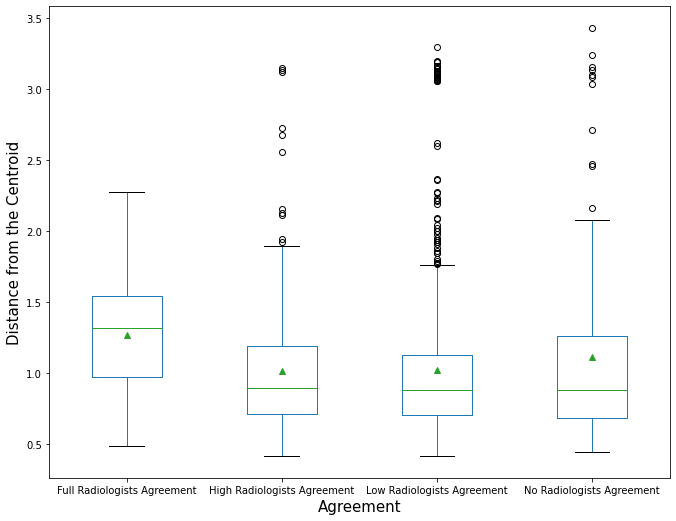

In [17]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

axes = df_distance.boxplot(by='Agreement',column =['Distance'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')
plt.ylabel("Distance from the Centroid", fontdict={'fontsize':15})
plt.xlabel("Agreement", fontdict={'fontsize':15})
#plt.xticks([0,1, 2, 3],['No Radiologist Agreement', 'Low Radiologist Agreement', 'High Radiologist Agreement', 'All Radiologists Agree'])
plt.show()

In [18]:
m1 = df_distance.groupby(['Agreement'])['Distance'].mean().values
print(m1)

[1.2691946  1.00926735 1.02235198 1.10769353]


In [19]:
m2 = df_distance.groupby(['Agreement'])['Distance'].median().values
print(m2)

[1.31819362 0.89498782 0.87579701 0.87971053]


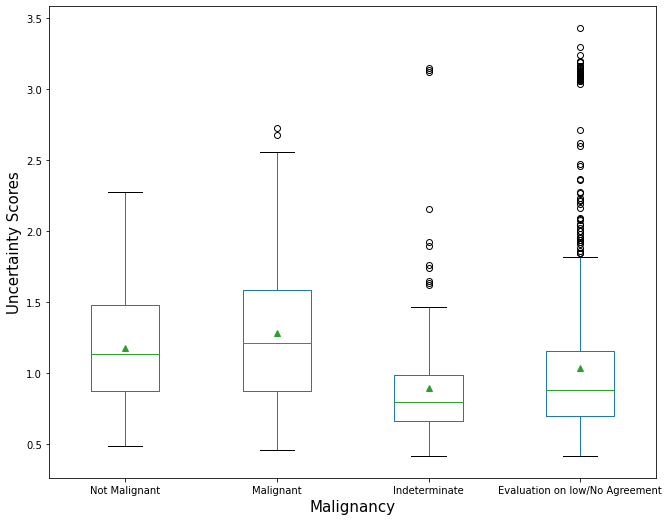

In [20]:
plt.rcParams["figure.figsize"] = [9.50, 7.50]
plt.rcParams["figure.autolayout"] = True
#df.plot(figsize=(20,20))

axes = df_distance.boxplot(by='Spiculation',column =['Distance'], showmeans=True, showfliers=True, grid= False)
axes.set_title('')
plt.title('')
plt.suptitle('')

plt.ylabel("Uncertainty Scores", fontdict={'fontsize':15})
plt.xlabel("Malignancy", fontdict={'fontsize':15})
plt.xticks([1, 2, 3,4], ['Not Malignant','Malignant', 'Indeterminate','Evaluation on low/No Agreement'])
plt.show()

In [21]:
m1 = df_distance.groupby(['Spiculation'])['Distance'].mean().values
print(m1)
m2 = df_distance.groupby(['Spiculation'])['Distance'].median().values
print(m2)

[1.17225633 1.28245618 0.89243598 1.03640269]
[1.13394169 1.20955994 0.79199073 0.87596302]
